# Anomaly Detection

Demo Notebooks SAM and Grounded DINO
- https://github.com/xinyu1205/recognize-anything/blob/main/recognize_anything_demo.ipynb
- https://github.com/xinyu1205/recognize-anything/blob/main/gui_demo.ipynb

In [1]:
from PIL import Image, ImageDraw, ImageFont
from detect_anything_grounded_dino import (
    extract_objects_from_bounding_boxes,
    inference,
    load_ram,
    load_tag2text,
    load_grounding_dino,
    # load_sam  
)

import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [2]:
%%capture
# usually takes around 1min on RTX 3090
ram_model = load_ram(device)
tag2text_model = load_tag2text(device)
grounding_dino_model = load_grounding_dino(device)
# sam_model = load_sam(device)

def inference_with_ram(img, do_det_seg):
    return inference(img, None, do_det_seg, "RAM", ram_model, grounding_dino_model, label_with_probab=False, device=device)

def inference_with_t2t(img, input_tags, do_det_seg):
    return inference(img, input_tags, do_det_seg, "Tag2Text", tag2text_model, grounding_dino_model, label_with_probab=False, device=device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


-----
RAM:
Start processing, image size (2068, 1450)
Tags:  adult, bear, bear cub, brown, brown bear, cub, huddle, lake, shore, sit, water


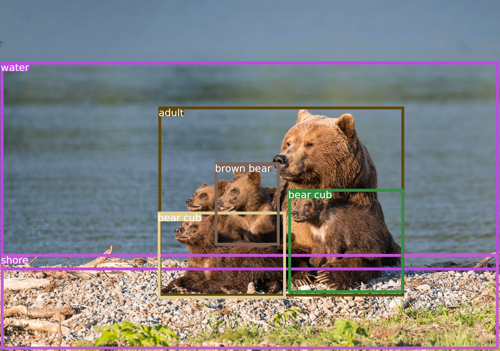

-----
RAM:
Start processing, image size (2048, 1365)
Tags:  brown, chase, sheepdog, corgi, dog, field, grass, grassy, neckband, red, run, white


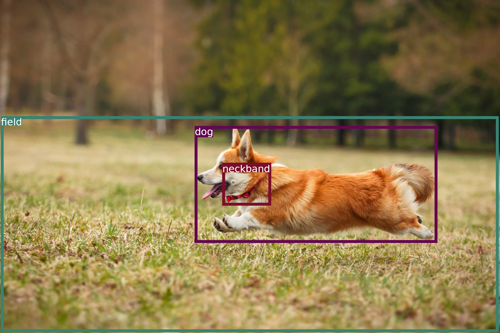

-----
RAM:
Start processing, image size (3295, 1846)
Tags:  bar stool, chair, color, draw, floor, mall, stool, store


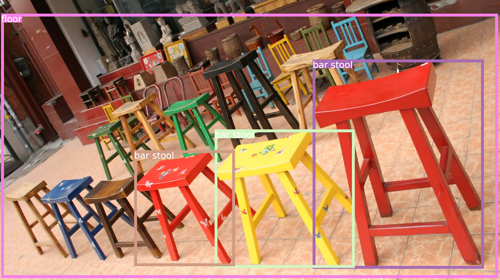

-----
RAM:
Start processing, image size (1072, 603)
Tags:  beach, black, brown, carry, chase, dog, mouth, sea, play, run, sand, stick, toy


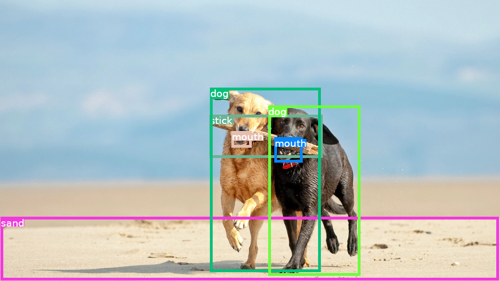

-----
RAM:
Start processing, image size (3000, 1999)
Tags:  ball, bat, cricket, cricket team, cricketer, game, man, play, player, referee, stand, test, wicket


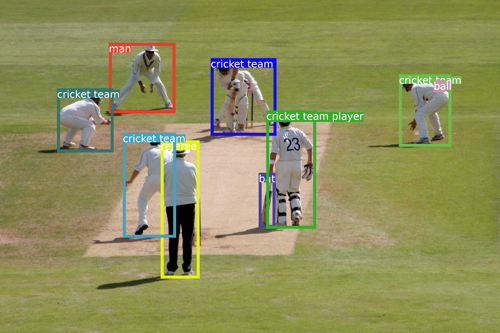

-----
RAM:
Start processing, image size (2048, 1364)
Tags:  cat, floor, jump, paw, play, stand


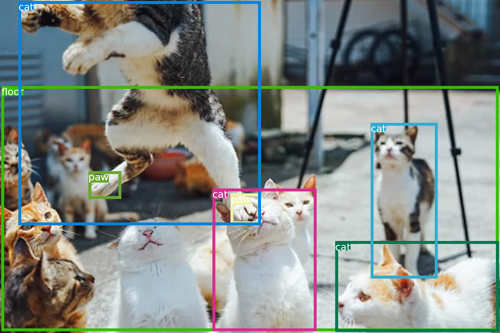

-----
RAM:
Start processing, image size (2048, 1367)
Tags:  dust, field, horse, grassy, herd, hillside, lush, plain, run, wild


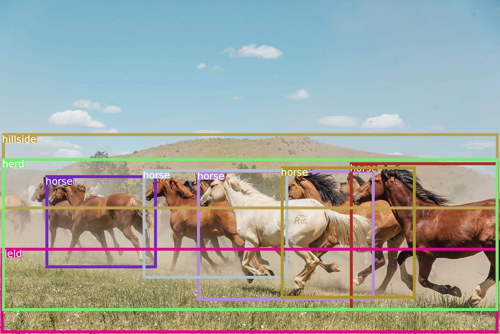

-----
RAM:
Start processing, image size (2500, 1661)
Tags:  figurine, frog, green, log, miniature, puddle, reflection, stone, sit, snail, tortoise, tree frog, turtle, water


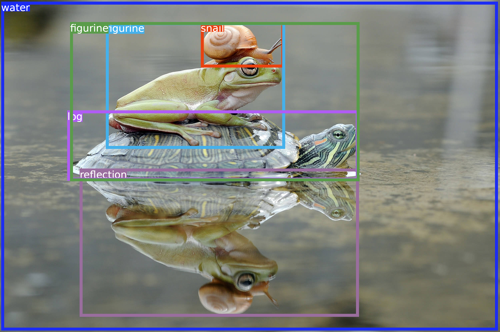

-----
RAM:
Start processing, image size (3000, 2155)
Tags:  armchair, blanket, lamp, carpet, couch, dog, floor, furniture, gray, green, living room, picture frame, pillow, plant, room, sit, stool, wood floor


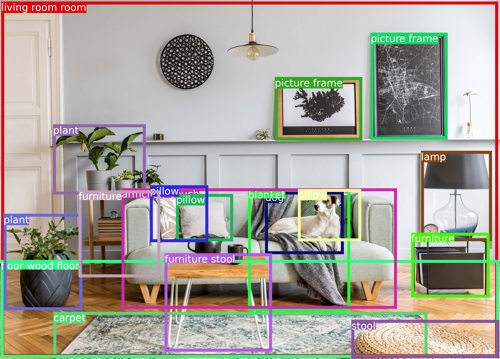

CPU times: user 3.14 s, sys: 30.3 ms, total: 3.17 s
Wall time: 3.02 s


In [6]:
%%time
n = 10
for i in range(1, n):
    in_img = Image.open(f"Grounded-Segment-Anything/assets/demo{i}.jpg")
    
    print("-----\nRAM:")
    ram_tags, ram_out_image, label2boxes, boxes_filt = inference_with_ram(in_img, do_det_seg=True)
    ram_out_image.thumbnail((500, 500))
    display(ram_out_image.convert("RGB"))
    # print(label2boxes)
    # print(boxes_filt)
    object_images = extract_objects_from_bounding_boxes(in_img, boxes_filt)
    # for i, obj in enumerate(object_images):
    #     print(label2boxes[i][0])
    #     display(obj)